### 회귀 분석 순서

1. 데이터를 확인
2. 데이터를 정제
3. 데이터를 분할
4. 데이터를 스케일링
5. 모델 학습
6. 성능 평가 및 예측값 저장

In [36]:
import pandas as pd

In [37]:
# boston.csv 파일 로드

boston = pd.read_csv('../../csv/boston.csv')

데이터 로드 이후 데이터 확인
    - 구조 : info, head/tail

In [38]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [39]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [40]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [41]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

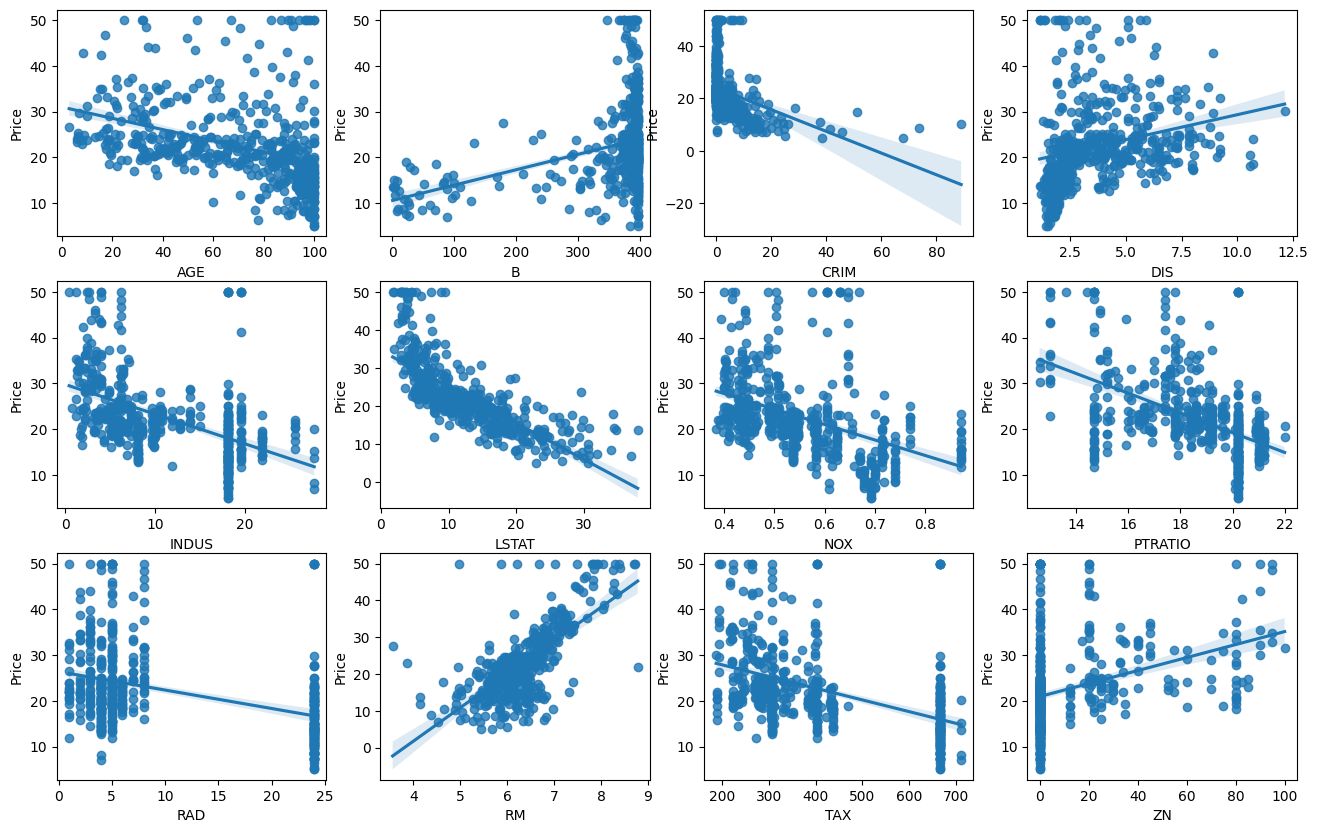

In [43]:
# 데이터의 분포도를 확인
# price와 나머지 컬럼들의 데이터 분포도 확인

# 그래프를 12개의 공간으로 나눠준다.

fig, axs = plt.subplots(
    figsize = (16, 10),
    ncols= 4,
    nrows= 3,
)



# 특정 컬럼의 이름을 제거한 리스트를 생성

features = boston.columns.difference(['Price', 'CHAS'])



for i, features in zip(range(12), features):

# i는 0부터 11까지 반복
# 좌표 값을 생성

    row = int(i/4)
    col = i % 4

    sns.regplot(
        x = features,
        y = boston['Price'],
        data= boston,
        ax= axs[row][col]
    )

plt.show()


In [44]:
# 데이터를 분할

from sklearn.model_selection import train_test_split

from random import randint

In [66]:
# 독립변수(x), 종속변수(y) 설정

x = boston[features].values

y = boston['Price'].values

# 데이터 분할

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=randint(1, 100))

In [67]:
print('train 데이터에서 price의 평균 : ', y_train.mean())
print('test 데이터에서 price의 평균 : ', y_test.mean())

train 데이터에서 price의 평균 :  23.09579207920792
test 데이터에서 price의 평균 :  20.302941176470586


In [68]:
# 스케일러 이용하여 각 데이터들의 범위를 고정
# min-max 스케일러를 이용한 스케일링

from sklearn.preprocessing import MinMaxScaler


In [78]:
# class 생성

scaler = MinMaxScaler()

scaler.fit(x_train)

# 범위를 잡을 데이터 셋 fitting

x_train_sc = scaler.transform(x_train)

ValueError: Expected 2D array, got 1D array instead:
array=[  0.    0.   21.   18.  100.   30.    0.   30.    0.    0.    0.   21.
   0.    0.    0.   22.   80.    0.    0.   85.   12.5   0.    0.    0.
  90.    0.    0.    0.   90.   95.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   12.5   0.
  33.    0.    0.   60.    0.    0.    0.   25.    0.    0.    0.   22.
   0.    0.   80.    0.   21.    0.    0.    0.   45.   12.5   0.   20.
   0.    0.    0.    0.   30.    0.   40.    0.   28.    0.   12.5   0.
   0.    0.   12.5   0.    0.   20.   34.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.   22.    0.    0.    0.   40.
   0.    0.    0.    0.    0.    0.    0.    0.    0.   60.    0.    0.
   0.   22.    0.    0.   85.    0.    0.    0.   25.    0.    0.    0.
   0.    0.   80.    0.    0.    0.    0.   20.    0.    0.    0.    0.
  33.    0.   20.    0.   40.    0.    0.   45.   80.    0.    0.    0.
   0.    0.   34.   20.   80.    0.    0.   80.    0.   52.5  75.    0.
  25.    0.    0.    0.   75.    0.    0.   55.    0.    0.   40.    0.
  20.    0.    0.    0.   12.5   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.   33.   20.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   82.5   0.
   0.    0.    0.   12.5   0.    0.    0.    0.    0.   45.   45.    0.
   0.    0.    0.   20.    0.    0.    0.   95.    0.   20.    0.    0.
  25.    0.    0.    0.    0.    0.   28.    0.    0.    0.    0.   80.
  25.    0.    0.    0.    0.   33.   80.    0.   25.    0.   25.   35.
  80.   25.    0.   22.    0.   21.    0.    0.    0.    0.    0.    0.
   0.    0.    0.   80.    0.    0.   35.    0.    0.    0.    0.   70.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.   90.    0.   45.    0.    0.    0.   30.    0.    0.    0.    0.
   0.    0.    0.    0.   80.    0.   90.    0.   40.    0.    0.   80.
  25.    0.   80.    0.   20.    0.   20.    0.   22.   34.    0.    0.
   0.   55.   60.    0.   70.    0.    0.   40.   40.    0.   20.    0.
   0.    0.    0.    0.   35.    0.   30.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.   12.5   0.    0.    0.
   0.    0.   90.    0.    0.    0.   28.    0.    0.    0.   52.5  80.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   20.    0.
   0.    0.    0.    0.   12.5   0.   30.    0. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [62]:
# 모델 학습
# 회귀 분석(linearRegression)

from sklearn.linear_model import LinearRegression

In [63]:
linear = LinearRegression()

In [64]:
# 모델 학습 데이터를 대입

linear.fit(x_train_sc, y_train)

NameError: name 'x_train_sc' is not defined

In [ ]:
# predict() 함수를 이용하여 학습 데이터를 예측한 값 저장

pred = linear.predict(x_train_sc)
pred

In [ ]:
# test 데이터를 이용한 예측값 저장

pred_t = linear.predict(x_test_sc)

In [79]:
pred_df = pd.DataFrame(pred, columns=['pred price'])

actual = pd.DataFrame(y_train, columns=['actual price'])

NameError: name 'pred' is not defined

In [ ]:
df = pd.concat([pred_df, actual], axis=1)

df.head()

In [ ]:
pred_t_df = pd.DataFrame(pred_t, columns=['pred price'])

actual2 = pd.DataFrame(y_test, columns=['actual price'])

df2 = pd.concat([pred_t_df, actual2], axis=1)

df2.head()